# IMPORTING LIBRARIES

In [111]:
#Basic libraries
import pandas as pd
import numpy as np

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#EDA and Statistics libraries
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import f_oneway

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

import sklearn.metrics as metrics

#modelling libraries
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import AdaBoostRegressor
import xgboost
from xgboost import XGBRegressor

from sklearn.ensemble import GradientBoostingRegressor

# READING/ IMPORTING FILES

### Features.csv:
             Temperature: Temperature during that week 
             Fuel_Price: Fuel Price during that week
             MarkDown: Seasonal discounts and Sale
             CPI: Consumer Price Index during that week
             Unemployment: The unemployment rate during that week
### Stores.csv:
             Store: Store number with range from 1-45
             Type: Types of stores ‘A’,’B’,’C’
             Size: Size of depending on no. products available store
### Sales.csv:
             Date: The date of the week where this observation was taken
             Weekly_Sales: Total Sales recorded during that week
             Dept: Department number in store, Range 1-99
             IsHoliday: a Boolean value representing a holiday week or not 

In [112]:
features = pd.read_csv('C:/Users/arvin/Desktop/Capstone/features.csv')
stores = pd.read_csv('C:/Users/arvin/Desktop/Capstone/stores.csv')
sales = pd.read_csv('C:/Users/arvin/Desktop/Capstone/sales.csv')

In [113]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [114]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [115]:
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


# MERGING FILES 

In [116]:
features_stores=features.merge(stores, on = 'Store', how = 'left' )

sales_final=sales.merge(features_stores, on = ['Store', 'Date', 'IsHoliday'], how = 'left' )

In [117]:
sales_final

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [118]:
sales_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [119]:
sales_final.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [120]:
sales_final.isnull().sum()/len(sales_final)*100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
dtype: float64

In [121]:
# Since we have above 65% missing data in columns Mardown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5 we will remove them 
# We will also be removing Date column as we are not using time series in our project

In [122]:
#Removing Column

sales_final=sales_final.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5', 'Date'], axis=1)

In [123]:
sales_final

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,21827.90,False,46.50,2.625,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,False,64.88,3.997,192.013558,8.684,B,118221
421566,45,98,628.10,False,64.89,3.985,192.170412,8.667,B,118221
421567,45,98,1061.02,False,54.47,4.000,192.327265,8.667,B,118221
421568,45,98,760.01,False,56.47,3.969,192.330854,8.667,B,118221


VARIABLE CATEGORIZATION

In [124]:
sales_final_num = sales_final.select_dtypes(include=np.number)
sales_final_cat = sales_final.select_dtypes(exclude=np.number)

In [125]:
sales_final_num

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
0,1,1,24924.50,42.31,2.572,211.096358,8.106,151315
1,1,1,46039.49,38.51,2.548,211.242170,8.106,151315
2,1,1,41595.55,39.93,2.514,211.289143,8.106,151315
3,1,1,19403.54,46.63,2.561,211.319643,8.106,151315
4,1,1,21827.90,46.50,2.625,211.350143,8.106,151315
...,...,...,...,...,...,...,...,...
421565,45,98,508.37,64.88,3.997,192.013558,8.684,118221
421566,45,98,628.10,64.89,3.985,192.170412,8.667,118221
421567,45,98,1061.02,54.47,4.000,192.327265,8.667,118221
421568,45,98,760.01,56.47,3.969,192.330854,8.667,118221


In [126]:
sales_final_cat

,IsHoliday,Type
0,False,A
1,True,A
2,False,A
3,False,A
4,False,A
...,...,...
421565,False,B
421566,False,B
421567,False,B
421568,False,B


MISSING VALUES

In [127]:
sales_final.isnull().sum()

Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [128]:
#We can see that since we have used merge we have no null values present in our final dataset.

# EXPLORATORY DATA ANALYSIS

DISTRIBUTION OF VARIABLES - UNIVARIATE ANALYSIS

In [129]:
sales_final_num.skew()

Store           0.077763
Dept            0.358223
Weekly_Sales    3.262008
Temperature    -0.321404
Fuel_Price     -0.104901
CPI             0.085219
Unemployment    1.183743
Size           -0.325850
dtype: float64

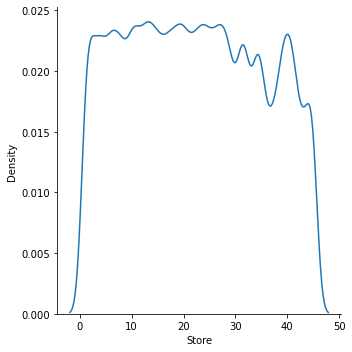

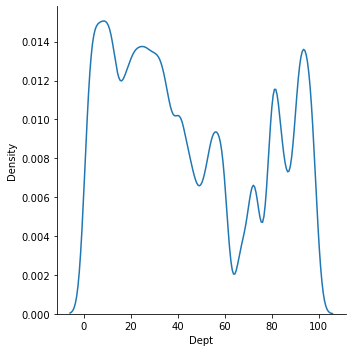

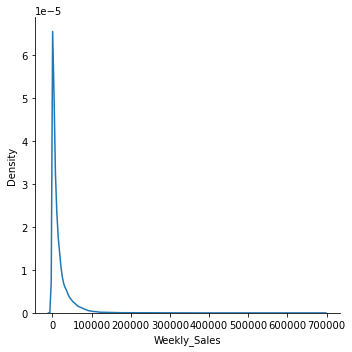

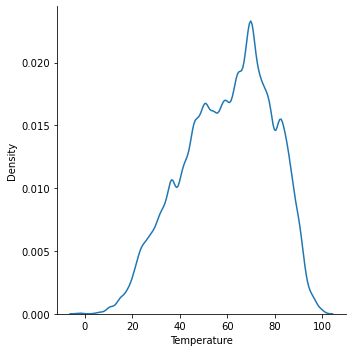

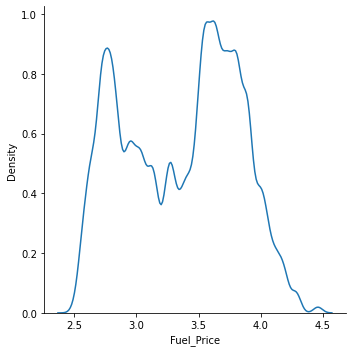

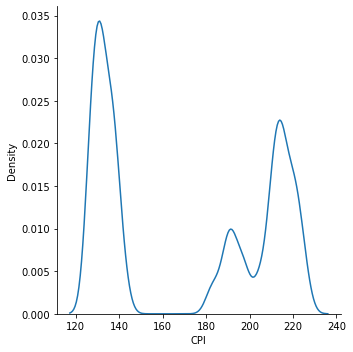

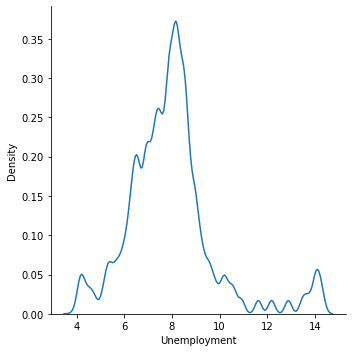

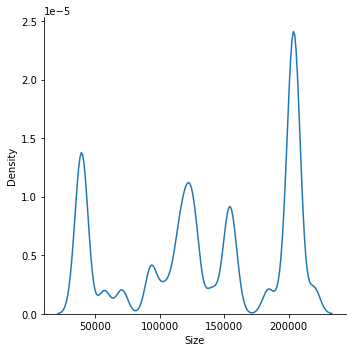

In [130]:
for i in sales_final_num.columns:
    sns.displot(sales_final_num[i],kind='kde')
    plt.show()

In [131]:
#We can observe that most of the variables are not Normally distributed.

RELATIONSHIP BETWEEN VARIABLES - BIVARIATE ANALYSIS

C:\Users\arvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



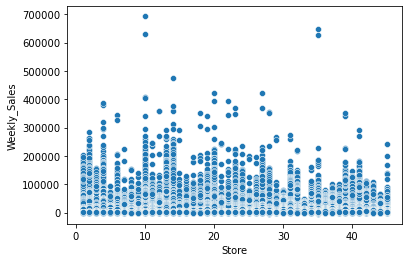

C:\Users\arvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



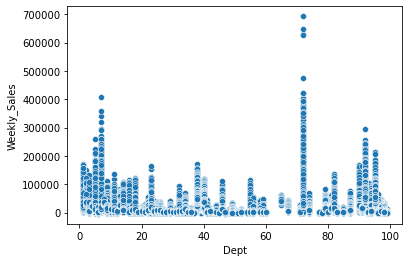

C:\Users\arvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



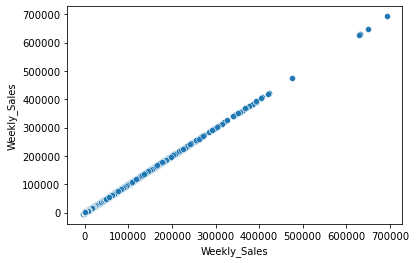

C:\Users\arvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



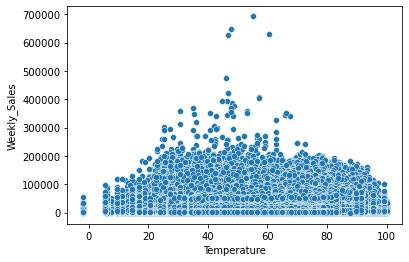

C:\Users\arvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



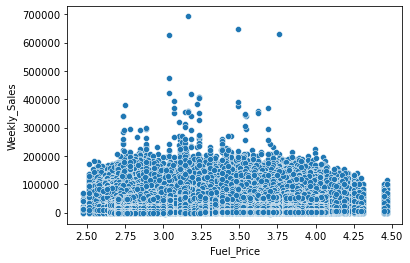

C:\Users\arvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



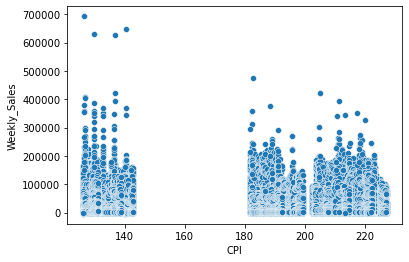

C:\Users\arvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



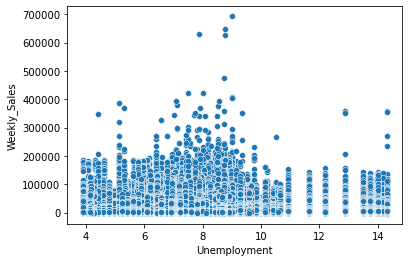

C:\Users\arvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



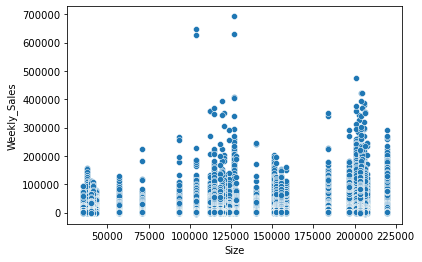

In [132]:
for i in sales_final_num.columns:
    sns.scatterplot(sales_final_num[i],sales_final_num['Weekly_Sales'])
    plt.show()

In [133]:
# 1.from 1st graph we can see that size increases sales didn't increase much
# 2.from 6th the graph we can see that even in infation index increase there is no change in the sales
# 3.from 7th the graph we can see that when unemployement is low there are more number sales happens as it increase more number of sales also decrease from 10 to 13 there is no data of sales

In [134]:
avg_store_sale=sales_final_num.groupby('Store').agg({'Weekly_Sales':np.mean})
px.bar(avg_store_sale)

In [135]:
#as shown in the above graph about avg sales of each store we can see that store 20 ,4 ,14 stores have highest sales 

In [136]:
avg_dept_sale=sales_final_num.groupby('Dept').agg({'Weekly_Sales':np.mean})
px.bar(avg_dept_sale)

In [137]:
#bottom left graphs about avg sales of each dept we can see that 92 95 38 department have highest sales in general

<AxesSubplot:xlabel='Type', ylabel='Size'>

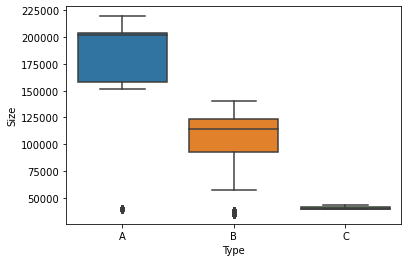

In [138]:
sns.boxplot(data=sales_final,x='Type',y='Size')

In [139]:
#from this we can see the difference in size according to store type

<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

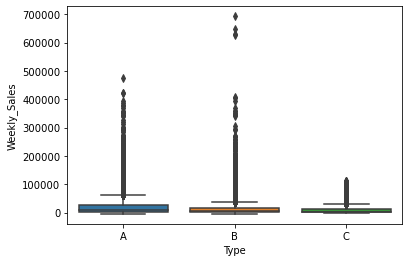

In [140]:
sns.boxplot(data=sales_final,x='Type',y='Weekly_Sales')

In [141]:
#From the above graph we cannot clearly observe the significance of store type on the weekly sales.

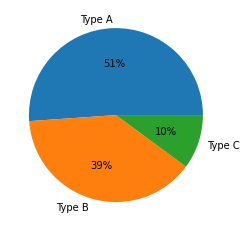

In [142]:
plt.pie(sales_final['Type'].value_counts(),labels=['Type A','Type B','Type C'],normalize=True,autopct='%1.0f%%')
plt.show()

In [143]:
#from the pie chart we can clearly see most of the 50% of walmart stores are bigger which is type a,40% of the store are type b which are medium size,
#only 10% of the stores are smaller

CORRELATION MATRIX

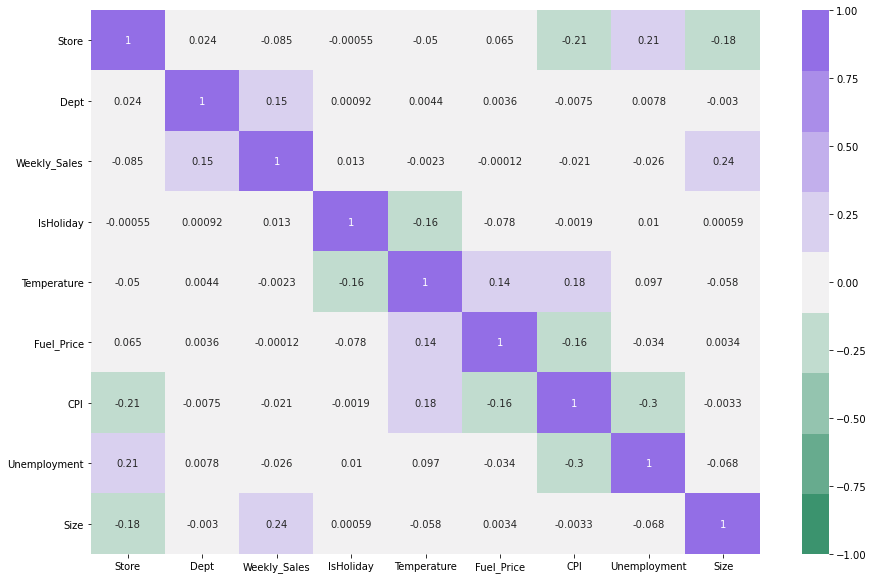

In [144]:
corr = sales_final.corr()
plt.figure(figsize = (15,10))
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9)

sns.heatmap(corr,  cmap=cmap,vmin=-1, vmax=1, annot=True)

plt.show()

In [145]:
#we used cor_relation matrix to find out the relation between the independent columns 
#but the maximum value is .25 so we couldnt inference anything with that bcoz we are looking for two varriable at a time 

VARIANCE INFLATION FACTOR

In [146]:
vif = pd.DataFrame()
vif["columns"] = sales_final_num.columns
vif["VIF"] = [variance_inflation_factor(sales_final_num.values, i) for i in range(sales_final_num.shape[1])]

In [147]:
vif

,columns,VIF
0,Store,4.370590
1,Dept,3.145815
2,Weekly_Sales,1.632871
3,Temperature,12.901991
4,Fuel_Price,29.882870
5,CPI,15.323255
6,Unemployment,16.437388
7,Size,6.262952


In [148]:
#so we used vif method to find the relation 
#from that we found fuel price=30,unemployement=16,cpi=15
#we also tried after dropping the fuel price column is there any significant but there is no big significant in the score

In [149]:
sales_final_num_temp=sales_final_num.drop('Fuel_Price',axis=1)

In [150]:
vif2 = pd.DataFrame()
vif2["columns"] = sales_final_num_temp.columns
vif2["VIF"] = [variance_inflation_factor(sales_final_num_temp.values, i) for i in range(sales_final_num_temp.shape[1])]

In [151]:
vif2

,columns,VIF
0,Store,4.114070
1,Dept,3.105586
2,Weekly_Sales,1.632609
3,Temperature,11.828025
4,CPI,12.846948
5,Unemployment,13.809460
6,Size,5.806271


OUTLIERS AND IT'S TREATMENTS

C:\Users\arvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



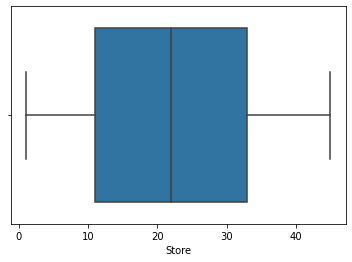

C:\Users\arvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



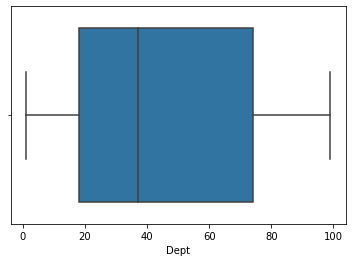

C:\Users\arvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



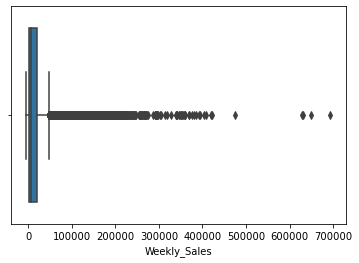

C:\Users\arvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



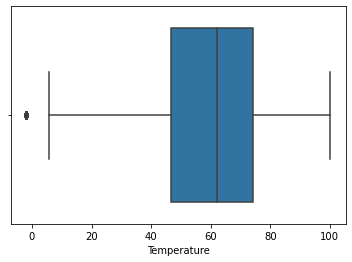

C:\Users\arvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



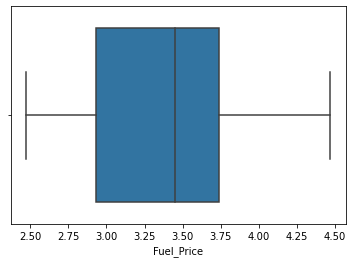

C:\Users\arvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



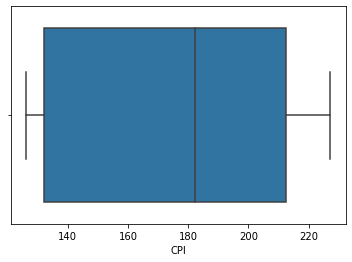

C:\Users\arvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



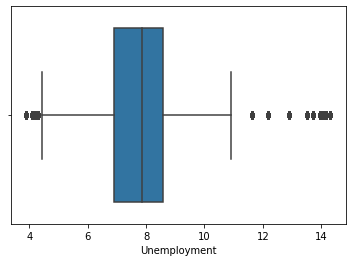

C:\Users\arvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



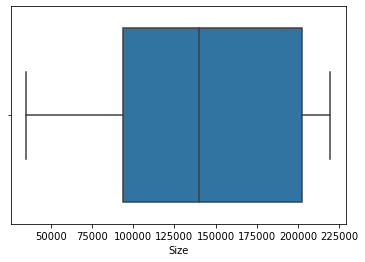

In [152]:
for i in sales_final_num.columns:
    sns.boxplot(sales_final_num[i])
    plt.show()

In [153]:
#from this we can see the outliers and only the variable unemployment has outliers present

STATISTICAL TESTS

In [154]:
type_a=sales_final[sales_final['Type']=='A']
type_b=sales_final[sales_final['Type']=='B']
type_c=sales_final[sales_final['Type']=='C']
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = f_oneway(type_a['Weekly_Sales'],type_b['Weekly_Sales'],type_c['Weekly_Sales'])

print('f-stat =',fvalue,'p-val =', pvalue)

#Hypothesis: Null Hypothesis: Average sales of type A=Average Sales of Type B=Average Sales of Type C
#            Alternate Hypothesis: Average sales of type A != Average Sales of Type B != Average Sales of Type C

f-stat = 7764.426217449252 p-val = 0.0


In [155]:
type_a.mean(),type_b.mean(),type_c.mean()

(Store               21.736419
 Dept                44.622156
 Weekly_Sales     20099.568043
 IsHoliday            0.070471
 Temperature         60.531945
 Fuel_Price           3.343999
 CPI                174.408895
 Unemployment         7.791595
 Size            182231.285486
 dtype: float64,
 Store               18.450417
 Dept                43.112273
 Weekly_Sales     12237.075977
 IsHoliday            0.070412
 Temperature         57.562951
 Fuel_Price           3.382523
 CPI                167.176656
 Unemployment         7.928836
 Size            101818.735827
 dtype: float64,
 Store              38.942015
 Dept               46.836350
 Weekly_Sales     9519.532538
 IsHoliday           0.069582
 Temperature        67.554266
 Fuel_Price          3.364654
 CPI               170.429314
 Unemployment        8.934350
 Size            40535.725286
 dtype: float64)

In [156]:
# from this we can reject the null hypothesis as the p-value is < 0.05
# hence the average weekly sales of all types are not similar

Ttest_indResult(statistic=-8.294756853931894, pvalue=1.0912222677432844e-16)


C:\Users\arvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

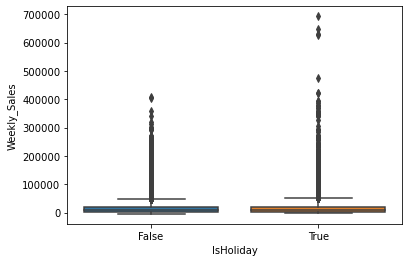

In [157]:
false=sales_final[sales_final['IsHoliday']==False]['Weekly_Sales']
true=sales_final[sales_final['IsHoliday']==True]['Weekly_Sales']

print(stats.ttest_ind(false,true))
sns.boxplot(sales_final['IsHoliday'],sales_final['Weekly_Sales'])

#HYPOTHESIS: Null Hypothesis: Average weekly sales on a holiday=Average weekly sales when not a holiday
#            Alternate Hypothesis: Average weekly sales on a holiday != Average weekly sales when not a holiday

In [158]:
false.mean(),true.mean()

(15901.445069008516, 17035.82318735048)

In [159]:
#from the above graph we reject the null hypother

# FEATURE ENGINEERING

TRANSFORMATION

In [160]:
pt = PowerTransformer()

In [161]:
temp=pt.fit_transform(sales_final_num.drop('Weekly_Sales',axis=1))
sales_final_transformed=pd.DataFrame(temp,columns=sales_final_num.drop('Weekly_Sales',axis=1).columns)

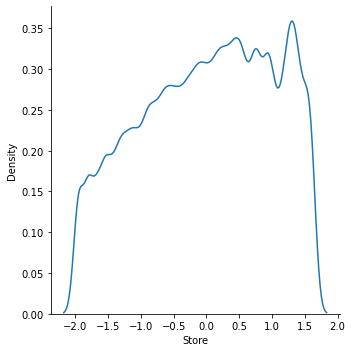

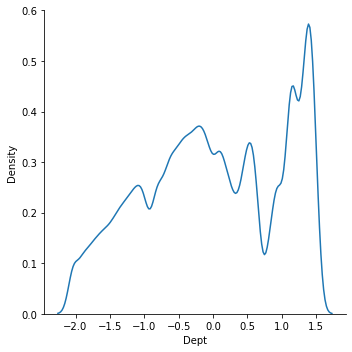

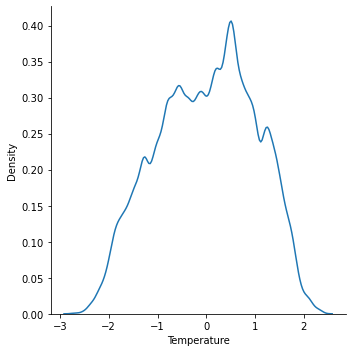

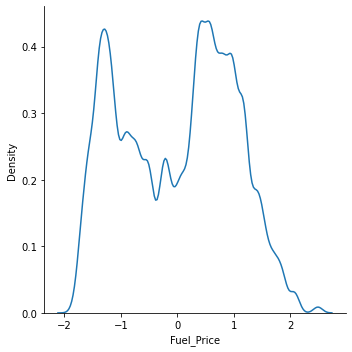

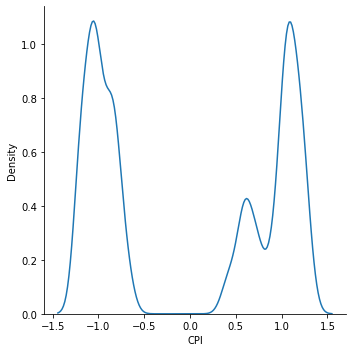

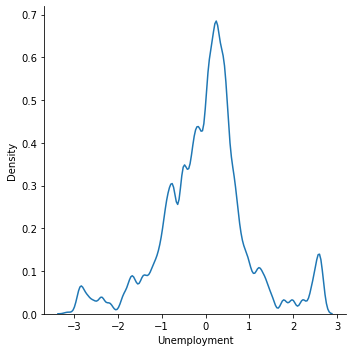

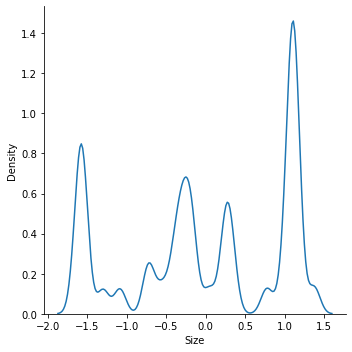

In [162]:
for i in sales_final_transformed.columns:
    sns.displot(sales_final_transformed[i],kind='kde')
    plt.show()

In [163]:
sales_final_transformed.skew()

Store          -0.204479
Dept           -0.163226
Temperature    -0.140617
Fuel_Price     -0.058352
CPI             0.025326
Unemployment   -0.019418
Size           -0.295886
dtype: float64

In [164]:
sales_final_num.skew()

Store           0.077763
Dept            0.358223
Weekly_Sales    3.262008
Temperature    -0.321404
Fuel_Price     -0.104901
CPI             0.085219
Unemployment    1.183743
Size           -0.325850
dtype: float64

In [165]:
#we can see that transformation has not helped us very much in the scaling of variables.

ENCODING

In [166]:
sales_final['IsHoliday']=sales_final['IsHoliday'].replace({False:0,True:1})
sales_final

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,24924.50,0,42.31,2.572,211.096358,8.106,A,151315
1,1,1,46039.49,1,38.51,2.548,211.242170,8.106,A,151315
2,1,1,41595.55,0,39.93,2.514,211.289143,8.106,A,151315
3,1,1,19403.54,0,46.63,2.561,211.319643,8.106,A,151315
4,1,1,21827.90,0,46.50,2.625,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0,64.88,3.997,192.013558,8.684,B,118221
421566,45,98,628.10,0,64.89,3.985,192.170412,8.667,B,118221
421567,45,98,1061.02,0,54.47,4.000,192.327265,8.667,B,118221
421568,45,98,760.01,0,56.47,3.969,192.330854,8.667,B,118221


In [167]:
oe=OrdinalEncoder(categories=[['C','B','A']])

In [168]:
sales_final['Type']=oe.fit_transform(sales_final[['Type']])

In [169]:
sales_final

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,24924.50,0,42.31,2.572,211.096358,8.106,2.0,151315
1,1,1,46039.49,1,38.51,2.548,211.242170,8.106,2.0,151315
2,1,1,41595.55,0,39.93,2.514,211.289143,8.106,2.0,151315
3,1,1,19403.54,0,46.63,2.561,211.319643,8.106,2.0,151315
4,1,1,21827.90,0,46.50,2.625,211.350143,8.106,2.0,151315
...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0,64.88,3.997,192.013558,8.684,1.0,118221
421566,45,98,628.10,0,64.89,3.985,192.170412,8.667,1.0,118221
421567,45,98,1061.02,0,54.47,4.000,192.327265,8.667,1.0,118221
421568,45,98,760.01,0,56.47,3.969,192.330854,8.667,1.0,118221


In [170]:
#We have encoded the variable 'isHoliday' boolean value to numeric
#We have used ordinal encoding on the variable 'Type' as there is an order in the sizes of the type of store

# MODELLING

OLS LINEAR REGRESSION BASE MODEL

In [171]:
x=sales_final.drop('Weekly_Sales',axis=1)
y=sales_final['Weekly_Sales']

xc=sm.add_constant(x)

ols_model=sm.OLS(y,xc)
Lin_model=ols_model.fit()

Lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     4413.
Date:                Wed, 23 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:40:34   Log-Likelihood:            -4.8078e+06
No. Observations:              421570   AIC:                         9.616e+06
Df Residuals:                  421560   BIC:                         9.616e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6829.4230    404.383     16.889      0.000    6036.845    7622.001
Store          -93.4265      2.774    -33.680      0.000     -98.863     -87.990
Dept           111.5098      1.097    101.649      0.000     109.360     113.660
IsHoliday     1345.0213    132.674     10.138      0.000    1084.985    1605.058
Temperature     25.1278      1.933     13.002      0.000      21.340      28.916
Fuel_Price    -410.4122     75.998     -5.400      0.000    -559.365    -261.459
CPI            -21.4446      0.952    -22.522      0.000     -23.311     -19.578
Unemployment  -229.2352     19.635    -11.675      0.000    -267.719    -190.751
Type         -1911.1368     87.763    -21.776      0.000   -2083.149   -1739.124
Size             0.1043      0.001    110.093      0.000       0.102       0.106
==============================================================================
Omnibus:                   298034.055   Durbin-Watson:                   0.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9049476.011
Skew:                           3.038   Prob(JB):                         0.00
Kurtosis:                      24.869   Cond. No.                     1.83e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#We can see that the R-squared is less than 1% hence it is not a reliable model

TRAIN TEST SPLIT

In [173]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

In [174]:
#statistical test on Train Test Split
#Hypothesis: NULL HYPOTHESIS: population mean = sample mean
#            ALTERNATE HYPOTHESIS: population mean != sample mean 

In [175]:
ybar=y.mean()
ytrain_bar=ytrain.mean()
ytest_bar=ytest.mean()

print(stats.ttest_1samp(ytrain,ybar))
print(stats.ttest_1samp(ytest,ybar))

Ttest_1sampResult(statistic=0.30146547140265123, pvalue=0.7630597882529415)
Ttest_1sampResult(statistic=-0.46156270890122825, pvalue=0.644395735761141)


In [176]:
#Since p-value for the test is greater than 0.05, we fail fail to reject the Null Hypothesis.
#Hence the population mean and sample mean are similar

OLS LINEAR REGRESSION ON TRAIN TEST SPLIT

In [183]:
ols_model=sm.OLS(ytrain,xtrain)
Lin_model=ols_model.fit()

ytrain_pred_ols=Lin_model.predict(xtrain)
ytest_pred_ols=Lin_model.predict(xtest)

train_rmse_ols=np.sqrt(metrics.mean_squared_error(ytrain,ytrain_pred_ols))
test_rmse_ols=np.sqrt(metrics.mean_squared_error(ytest,ytest_pred_ols))

print(train_rmse_ols)
print(test_rmse_ols)

21728.217850100387
21697.204285672862


In [ ]:
#We have used train test split on the base model and we can see that the RMSE value is really high and it is underfit

DECISION TREE MODEL 

In [182]:
dt = DecisionTreeRegressor(random_state=10)
dt.fit(xtrain,ytrain)

ytrain_pred_dt=dt.predict(xtrain)
ytest_pred_dt=dt.predict(xtest)

train_rmse_dt=np.sqrt(metrics.mean_squared_error(ytrain,ytrain_pred_dt))
test_rmse_dt=np.sqrt(metrics.mean_squared_error(ytest,ytest_pred_dt))

print(train_rmse_dt)
print(test_rmse_dt)

1.8209971323224476e-17
7437.967750958454


In [ ]:
#In this model, since decision tree has the characteristics of high variance error and by observing the rmse value we can 
#say that the model is also overfitting

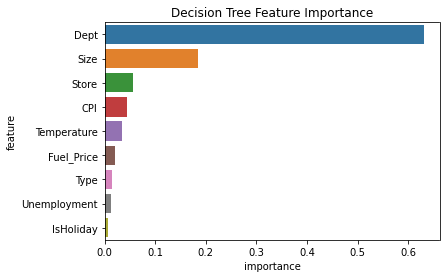

In [73]:
#FEATURE IMPORTANCE USING DECISION TREE

feature_importance_dt = dt.feature_importances_
feature_importance_dt_df = pd.DataFrame({
    'feature': xtrain.columns,
    'importance': feature_importance_dt
}).sort_values('importance', ascending=False)
plt.title('Decision Tree Feature Importance')
sns.barplot(data=feature_importance_dt_df.head(10), x='importance', y='feature');

In [ ]:
#here we can see that 'Dept','Size','Store' are the 3 most important features

RANDOM FOREST

In [187]:
rf=RandomForestRegressor(n_estimators=80,random_state=0)
rf.fit(xtrain,ytrain)

ypred_train_rf=rf.predict(xtrain)
ypred_test_rf=rf.predict(xtest)

train_rmse_rf=np.sqrt(metrics.mean_squared_error(ytrain,ypred_train_rf))
test_rmse_rf=np.sqrt(metrics.mean_squared_error(ytest,ypred_test_rf))

print(train_rmse_rf)
print(test_rmse_rf)

2088.5799382727982
5638.807122124864


In [200]:
#By using random forest model we get the very low train rmse and test rmse. 

In [189]:
#HYPERPARAMETER TUNING FOR RANDOMFOREST

def test_params(**params):
    model=RandomForestRegressor(random_state=20, n_jobs=-1, n_estimators=80, **params).fit(xtrain,ytrain)
    train_rmse = metrics.mean_squared_error(model.predict(xtrain), ytrain, squared=False)
    test_rmse  = metrics.mean_squared_error(model.predict(xtest), ytest, squared=False)
    return train_rmse, test_rmse

In [190]:
def test_param_and_plot(param_name, param_values):
    train_errors, test_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, test_rmse = test_params(**params)
        train_errors.append(train_rmse)
        test_errors.append(test_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, test_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Test'])

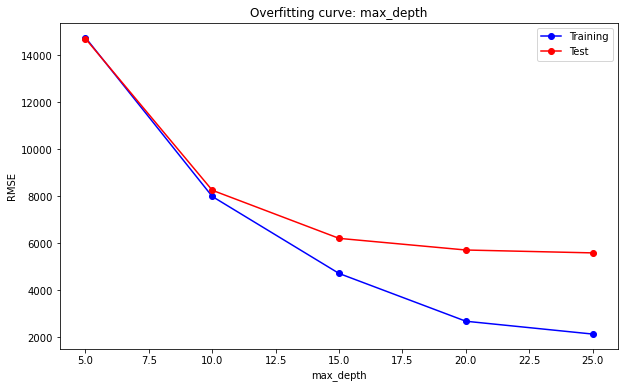

In [77]:
# Checking Hyperparameter 'Max Depth'
test_param_and_plot('max_depth',[5,10,15,20,25])

In [ ]:
#by using hyperparameter 'max depth' we can see the trendlines of its effect on the fit of the random forest model 
#and as the max depth increases the model gets overfitting

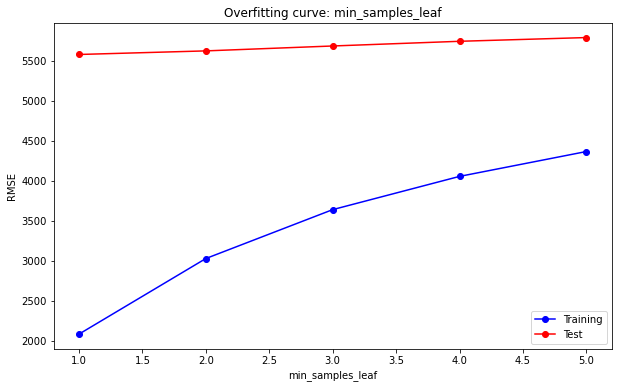

In [78]:
# Checking Hyperparameter 'Min Samples Leaf'
test_param_and_plot('min_samples_leaf', [1, 2, 3, 4, 5])

In [ ]:
#we can see the effect of hyperparameter 'min samples leaf' on the fit of the model and it is clearly overfitting

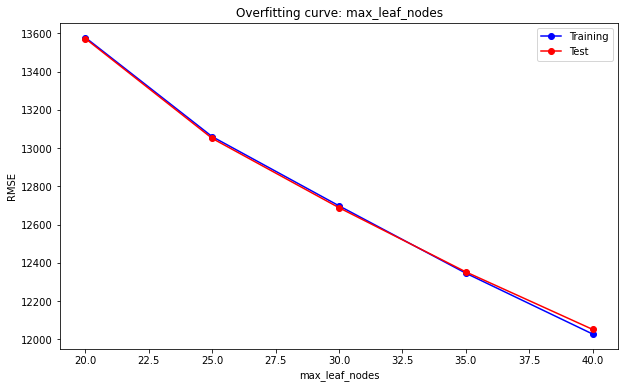

In [79]:
# Checking Hyperparameter 'Max Leaf Nodes'
test_param_and_plot('max_leaf_nodes', [20, 25, 30, 35, 40])

In [ ]:
#As we tune the hyperparameter 'max leaf nodes' there is no change in the fit of the model but the RMSE reduces

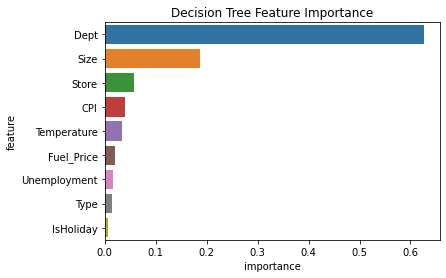

In [80]:
feature_importance_rf = rf.feature_importances_

feature_importance_rf_df = pd.DataFrame({
    'feature': xtrain.columns,
    'importance': feature_importance_rf
}).sort_values('importance', ascending=False)

plt.title('Random Forest Feature Importance')

sns.barplot(data=feature_importance_rf_df.head(10), x='importance', y='feature');

In [ ]:
#here also we can see that 'Dept','Size','Store' are the 3 most important features

K NEAREST NEIGHBORS

In [201]:
knn=KNeighborsRegressor(n_neighbors=10)

sc=StandardScaler()

scaled_xtrain=sc.fit_transform(xtrain)
scaled_xtest=sc.transform(xtest)

knn.fit(scaled_xtrain,ytrain)

ytrain_pred_knn=knn.predict(xtrain)
ytest_pred_knn=knn.predict(xtest)

train_rmse_knn=np.sqrt(metrics.mean_squared_error(ytrain,ytrain_pred_knn))
test_rmse_knn=np.sqrt(metrics.mean_squared_error(ytest,ytest_pred_knn))

print(train_rmse_knn)
print(test_rmse_knn)

41141.40293114002
41106.340196076344


In [ ]:
#This model has a very high RMSE value for both train and test

ADA BOOST REGRESSOR

In [202]:
abr = AdaBoostRegressor(random_state=20, n_estimators=100)
abr.fit(xtrain,ytrain)

ytrain_pred_abr=abr.predict(xtrain)
ytest_pred_abr=abr.predict(xtest)

train_rmse_abr=np.sqrt(metrics.mean_squared_error(ytrain,ytrain_pred_abr))
test_rmse_abr=np.sqrt(metrics.mean_squared_error(ytest,ytest_pred_abr))

print(train_rmse_abr)
print(test_rmse_abr)

24947.402335055227
24962.267372569986


In [ ]:
#This model also comparatively has high RMSE train and test values 

XG BOOSTING REGRESSOR

In [203]:
xgb = XGBRegressor(n_estimators= 80) 
xgb.fit(xtrain,ytrain)

ytrain_pred_xgb=xgb.predict(xtrain)
ytest_pred_xgb=xgb.predict(xtest)

train_rmse_xgb=np.sqrt(metrics.mean_squared_error(ytrain,ytrain_pred_xgb))
test_rmse_xgb=np.sqrt(metrics.mean_squared_error(ytest,ytest_pred_xgb))

print(train_rmse_xgb)
print(test_rmse_xgb)

6517.777594105686
7059.424754864773


In [ ]:
#This model has a moderate train and test RMSE values

GRADIENT BOOSTING REGRESSOR

In [204]:
gbr= GradientBoostingRegressor(n_estimators=80) 
gbr.fit(xtrain,ytrain)

ytrain_pred_gbr=gbr.predict(xtrain)
ytest_pred_gbr=gbr.predict(xtest)

train_rmse_gbr=np.sqrt(metrics.mean_squared_error(ytrain,ytrain_pred_gbr))
test_rmse_gbr=np.sqrt(metrics.mean_squared_error(ytest,ytest_pred_gbr))

print(train_rmse_gbr)
print(test_rmse_gbr)

12039.686864624397
12060.122708963318


In [ ]:
#This model has a little high RMSE values for train and test data

In [199]:
from prettytable import PrettyTable   
x = PrettyTable()
x.field_names = ["Model","Train RMSE", "Test RMSE"]
x.add_row(["Linear Regression (Baseline)",round(train_rmse_ols,2),round(test_rmse_ols,2) ])
x.add_row(["Decision Tree Regressor",train_rmse_dt,round(test_rmse_dt,2)])
x.add_row(["Random Forest Regressor",round(train_rmse_rf,2),round(test_rmse_rf,2)])
x.add_row(["KNN Regressor",round(train_rmse_knn,2),round(test_rmse_knn,2)])
x.add_row(["Ada Boost Regressor",round(train_rmse_abr,2),round(test_rmse_abr,2)])
x.add_row(["XGB Regressor" ,round(train_rmse_xgb,2),round(test_rmse_xgb,2)])
x.add_row(["Gradient Boosting Regressor",round(train_rmse_gbr,2),round(test_rmse_gbr,2)])
print(x)

+------------------------------+------------------------+-----------+
|            Model             |       Train RMSE       | Test RMSE |
+------------------------------+------------------------+-----------+
| Linear Regression (Baseline) |        21728.22        |  21697.2  |
|   Decision Tree Regressor    | 1.8209971323224476e-17 |  7437.97  |
|   Random Forest Regressor    |        2088.58         |  5638.81  |
|        KNN Regressor         |        41141.4         |  41106.34 |
|     Ada Boost Regressor      |        24947.4         |  24962.27 |
|        XGB Regressor         |        6517.78         |  7059.42  |
| Gradient Boosting Regressor  |        12039.69        |  12060.12 |
+------------------------------+------------------------+-----------+


From the above table we can see that RANDOM FOREST REGRESSOR model has the least RMSE score for train and test data
and would be the best model to predict future sales of Walmart dataset with the given features.